# Generate figure of taxonomy

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, fcluster

Metadata

In [3]:
v = 'v10'
lower_cut = 200  # the lowest level shown in tree - matched to labels in pmtiles
higher_cut = 1000  # level at which colors are assigned

Read linkage matrix.

In [4]:
linkage_matrix = np.load(f'/data/uscuni-ulce/processed_data/clusters/complete_linkage_10_{v}.npy')

Code for circular dendrogram.

In [5]:
def smoothsegment(seg, Nsmooth=100):
    return np.concatenate([[seg[0]], np.linspace(seg[1], seg[2], Nsmooth), [seg[3]]])

In [13]:
low = fcluster(linkage_matrix, lower_cut, criterion='distance')
high = fcluster(linkage_matrix, higher_cut, criterion='distance')

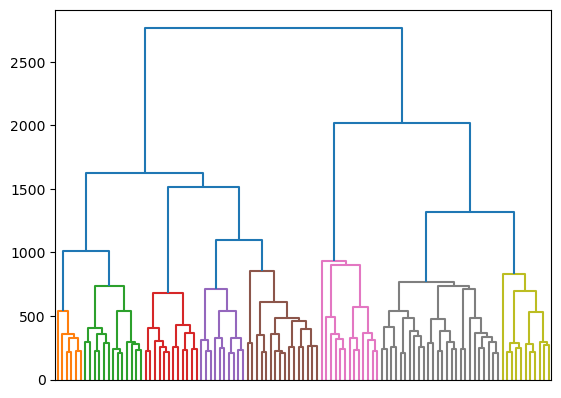

In [25]:
d = dendrogram(linkage_matrix , no_plot=False, truncate_mode='lastp', p=107, color_threshold=higher_cut, no_labels=True)

In [42]:
icoord = np.array(d['icoord'])
dcoord = np.array(d['dcoord'])
gap = 0.01

dcoord = -dcoord
# avoid a wedge over the radial labels
imax = icoord.max()
imin = icoord.min()
icoord = ((icoord - imin)/(imax - imin)*(1-gap) + gap/2)*2*np.pi

/tmp/ipykernel_5251/3473409566.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.round(np.linspace(imin, imax, Nxticks)).astype(int))


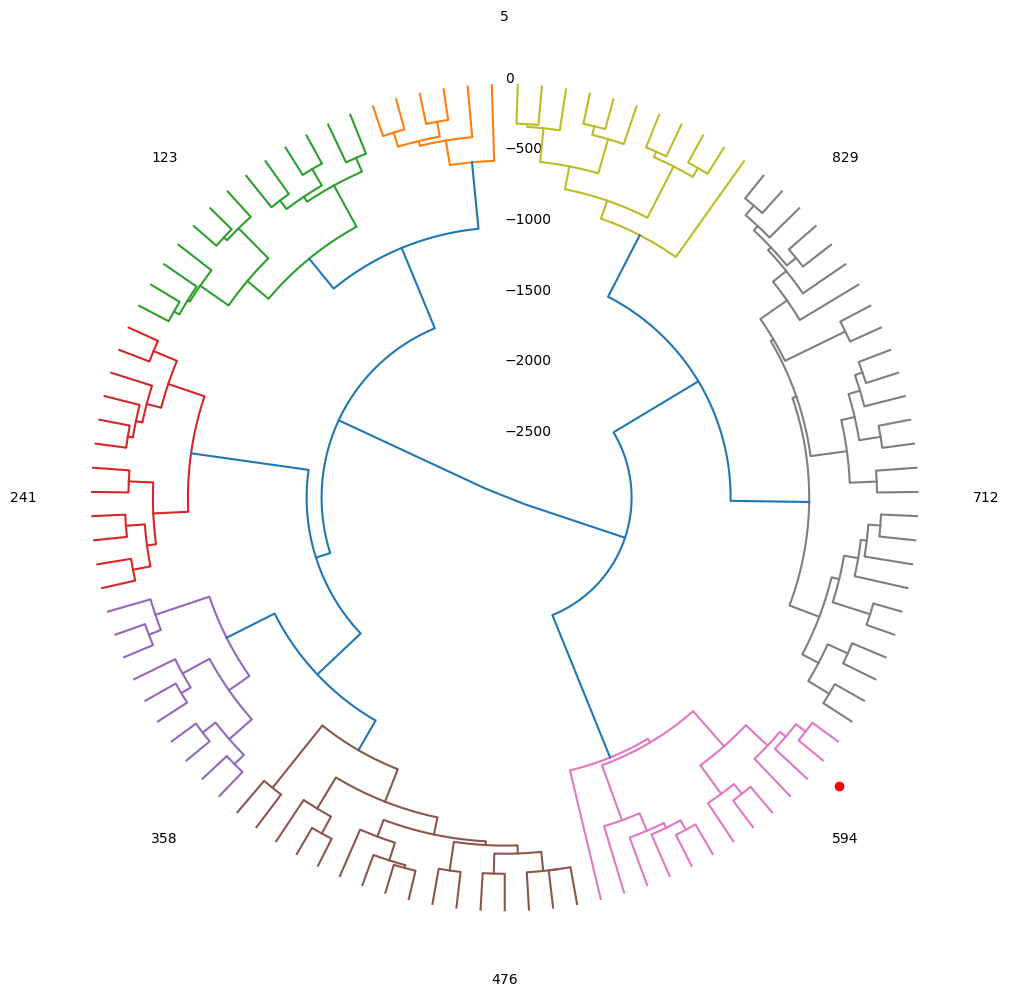

In [45]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, polar=True)

for xs, ys, color in zip(icoord[:-1], dcoord[:-1], d['color_list'][:-1]):
    xs = smoothsegment(xs)
    ys = smoothsegment(ys)
    ax.plot(xs,ys, color=color)


ax.plot(icoord[-1], dcoord[-1], color=d['color_list'][-1])

ax.spines['polar'].set_visible(False)
ax.set_rlabel_position(0)
Nxticks = 10
xticks = np.linspace(gap/2, 1-gap/2, Nxticks)
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xticklabels(np.round(np.linspace(imin, imax, Nxticks)).astype(int))

ax.grid(False)
ax.set_theta_zero_location("N")
ax.scatter(4, 200, color='red')

In [75]:
dcoord = d['dcoord']
icoord = d['icoord']

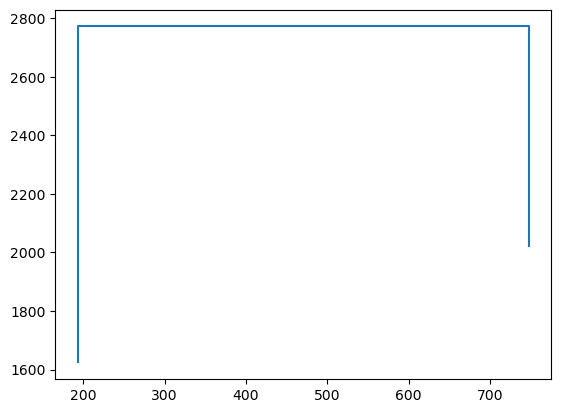

In [79]:
plt.plot(icoord[-1], dcoord[-1])